In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path=r'C:\Users\jinu5\Desktop\careerfoundry\Achivement 4\Instacart Basket Analysis_2024-01-02'
insta_cleaned=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'insta_cleaned.pkl'))

In [3]:
insta_cleaned.isnull().sum()

order_id                            0
user_id                             0
order_number                        0
order_day_of_week                   0
order_hour_of_day                   0
days_since_previous_order           0
product_id                          0
add_to_cart_order                   0
reordered                           0
product_name                        0
aisle_id                            0
department_id                       0
prices                           5127
price_range_loc                     0
busiest_day                         0
busiest_days                        0
busiest_period_of_day               0
max_order                           0
loyalty_flag                        0
average_spending                    0
spending_flag                       0
order_frequency                     0
frequency_flag                      0
First Name                          0
Last Name                           0
Gender                              0
STATE       

### Step 2. create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

### bar chart

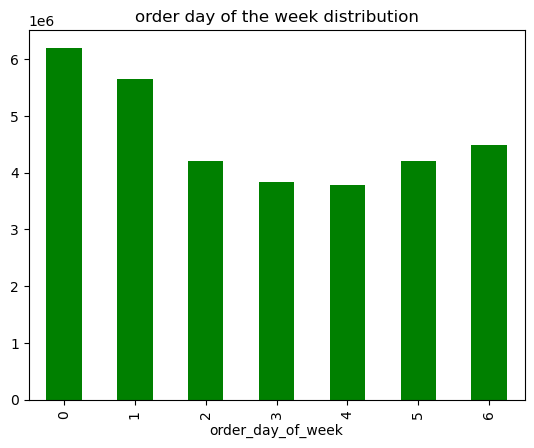

In [5]:
# bar Chart
plt.title('order day of the week distribution')
bar_odow=insta_cleaned['order_day_of_week'].value_counts().sort_index().plot.bar(color='green')


In [7]:
#export graph
bar_odow.figure.savefig(os.path.join(path, '04 Analysis/Visualizations/bar_odow.png'))

### histogram

<Axes: ylabel='Frequency'>

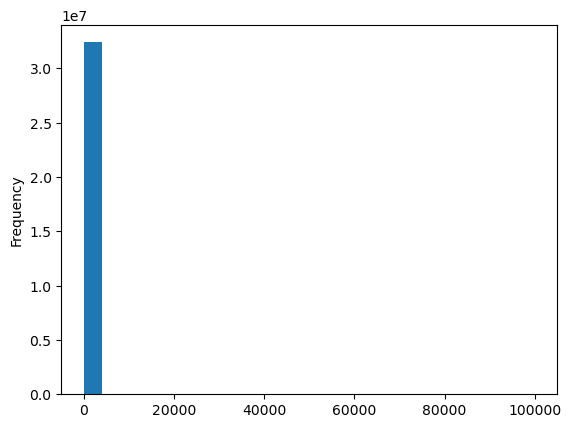

In [8]:
insta_cleaned['prices'].plot.hist(bins=25)

In [3]:
insta_cleaned['prices'].describe()

count    3.239973e+07
mean     7.790994e+00
std      4.241809e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

<Axes: xlabel='prices', ylabel='prices'>

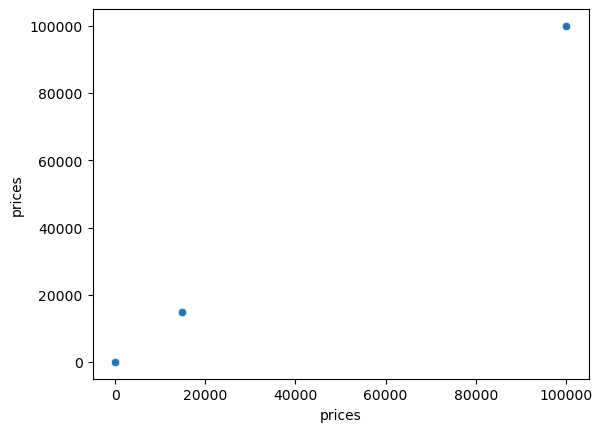

In [10]:
sns.scatterplot(x='prices', y='prices', data = insta_cleaned)

In [19]:
# except for outliers
insta_cleaned.loc[insta_cleaned['prices'] > 15, 'prices'] = np.nan

In [20]:
insta_cleaned['prices'].describe()

count    3.198718e+07
mean     7.625666e+00
std      3.997539e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.300000e+00
75%      1.110000e+01
max      1.500000e+01
Name: prices, dtype: float64

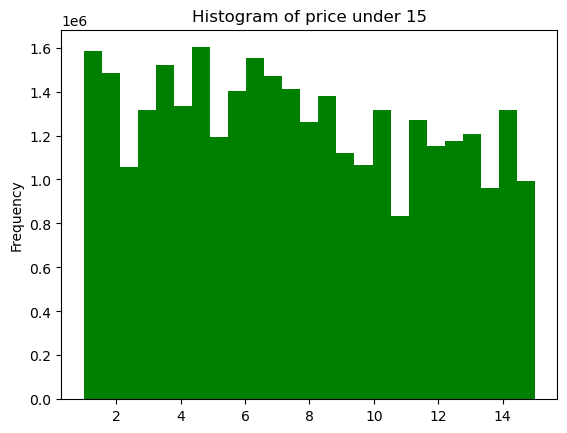

In [22]:
plt.title('Histogram of price under 15')
hist=insta_cleaned['prices'].plot.hist(bins=25, color='green')

In [23]:
hist.figure.savefig(os.path.join(path, '04 Analysis/Visualizations/hist-price_under15.png'))

In [21]:
insta_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 32 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   order_id                   int32  
 1   user_id                    int32  
 2   order_number               int8   
 3   order_day_of_week          int8   
 4   order_hour_of_day          int8   
 5   days_since_previous_order  float16
 6   product_id                 int32  
 7   add_to_cart_order          int32  
 8   reordered                  int32  
 9   product_name               object 
 10  aisle_id                   int8   
 11  department_id              int32  
 12  prices                     float64
 13  price_range_loc            object 
 14  busiest_day                object 
 15  busiest_days               object 
 16  busiest_period_of_day      object 
 17  max_order                  int8   
 18  loyalty_flag               object 
 19  average_spending           float16
 20  

In [22]:
insta_cleaned.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_previous_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,First Name,Last Name,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,RegularF customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,RegularF customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,RegularF customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,RegularF customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,RegularF customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


### scatter plot : income and average spending

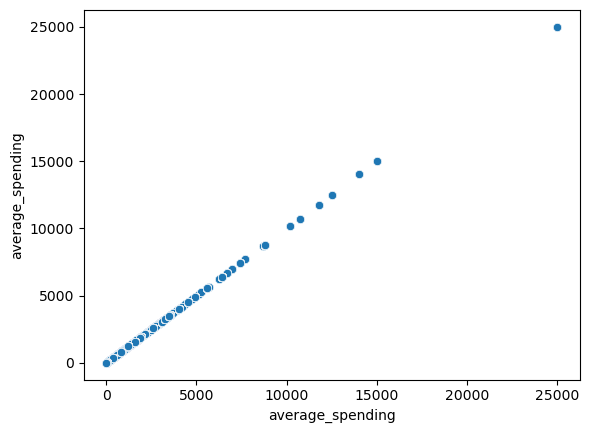

In [5]:
    scatter_income_spending=sns.scatterplot(x='average_spending', y='average_spending', data = insta_cleaned)

In [10]:
# except for outliers
insta_cleaned.loc[insta_cleaned['average_spending'] > 20000, 'average_spending'] = np.nan

In [11]:
insta_cleaned['average_spending']

0            6.367188
1            6.367188
2            6.367188
3            6.367188
4            6.367188
              ...    
32404854    10.703125
32404855     8.101562
32404856     8.101562
32404857     8.101562
32404858     8.101562
Name: average_spending, Length: 32404859, dtype: float16

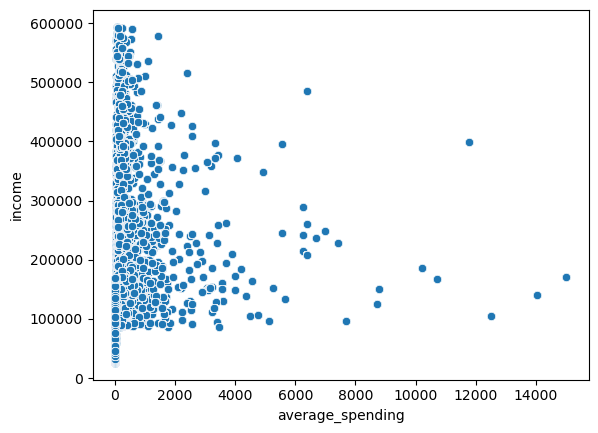

In [12]:
    scatter_income_spending=sns.scatterplot(x='average_spending', y='income', data = insta_cleaned)

In [27]:
scatter_income_spending.figure.savefig(os.path.join(path, '04 Analysis/Visualizations/scatter_income_spending.png'))

### Sampling

In [4]:
np.random.seed(4)
dev = np.random.rand(len(insta_cleaned))<=0.7

In [83]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [5]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [6]:
big=insta_cleaned[dev]

In [7]:
small=insta_cleaned[~dev]

In [34]:
len(insta_cleaned)

32404859

In [62]:
len(big)+len(small)

32404859

In [35]:
df_2 = small[['order_day_of_week','prices']]


C:\Users\jinu5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jinu5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


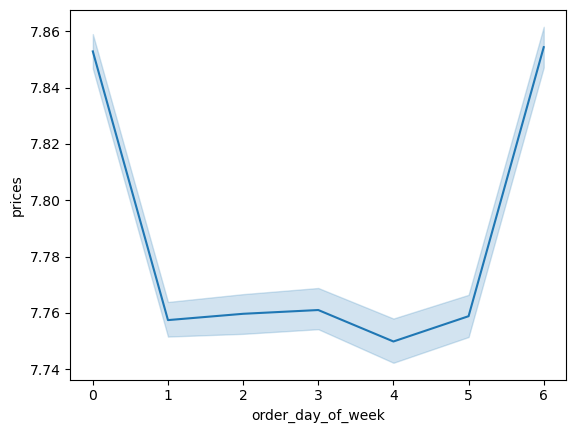

In [36]:
line = sns.lineplot(data = df_2, x = 'order_day_of_week',y = 'prices')

In [37]:
line.figure.savefig(os.path.join(path, '04 Analysis/Visualizations/line_odow_price.png'))

### Step 3.  descriptive findings about sales. Create a histogram of the “order_hour_of_day”

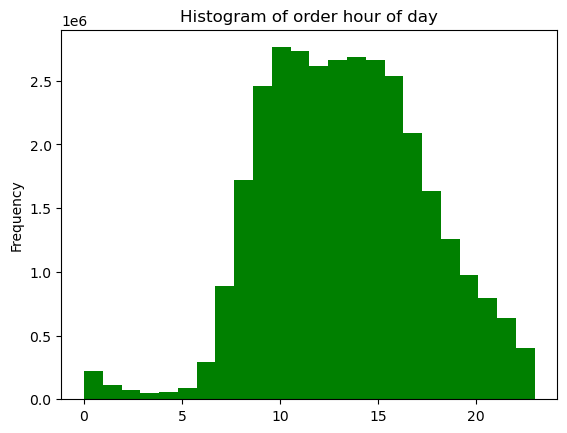

In [41]:
plt.title('Histogram of order hour of day')
hist_ord_hour_day=insta_cleaned['order_hour_of_day'].plot.hist(bins=24, color='green')

In [39]:
hist_ord_hour_day.figure.savefig(os.path.join(path, '04 Analysis/Visualizations/hist_order_hour.png'))

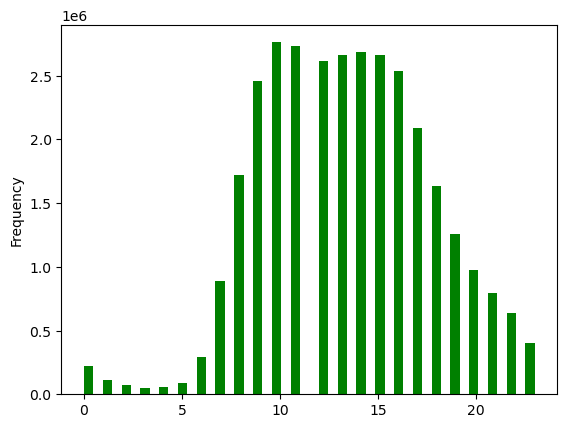

In [42]:
hist_ord_hour_day=insta_cleaned['order_hour_of_day'].plot.hist(bins=48, color='green')

The amount of orders begin to increase from 7am, and the busiest hours are between 9am and 18pm, the amount is over 2.0 (million orders per hour).   From 6pm, the amount keeps decreasing, and after 8pm till to next morning it is under 1.0 million orders.   The period from 12am to 6am is the lowest order hours, under 0.5 orders.



### Step 4. the distribution of orders among customers in terms of loyalty  / Create a bar chart from the “loyalty_flag”

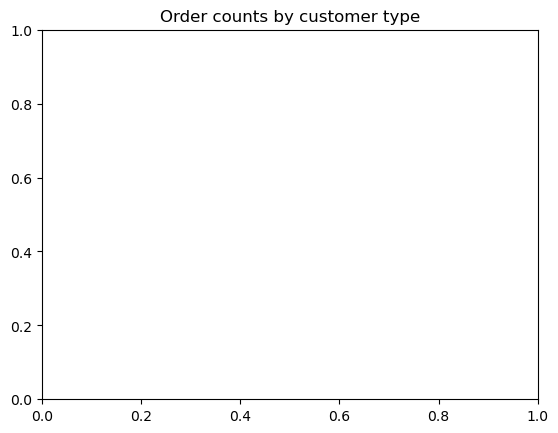

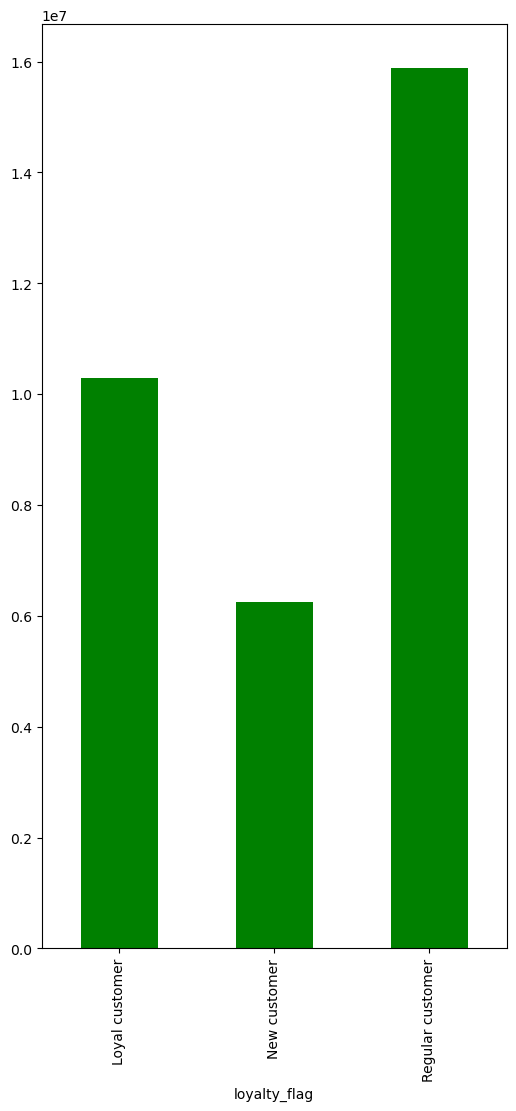

In [8]:
plt.title('Order counts by customer type')
plt.figure(figsize=(6, 12))
bar_loyalty=insta_cleaned['loyalty_flag'].value_counts().sort_index().plot.bar(color='green')


In [9]:
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis/Visualizations/bar_loyalty.png'))

#### In total orders, % of order by reugular customer is highiest, folloewd by loyal customer and new customer.  

### Total spend by customer type

In [56]:
# counts by c. type
insta_cleaned['loyalty_flag'].value_counts()

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: count, dtype: int64

In [86]:
# ave. spend in 1 order by c. type
insta_cleaned.groupby('loyalty_flag').agg({'prices':['mean', 'min', 'max']})

prices           
                      mean  min   max
loyalty_flag                         
Loyal customer    7.773575  1.0  25.0
New customer      7.801206  1.0  25.0
Regular customer  7.798262  1.0  25.0

In [89]:
data = {'customer_type': ['Regular customer', 'Loyal customer', 'New customer'],
        'count': [15876776, 10284093, 6243990],
        'average_spend': [7.798262, 7.773575, 7.801206]}

df = pd.DataFrame(data)

df['total_spend'] = df['count'] * df['average_spend'] / 1000000

print(df)

      customer_type     count  average_spend  total_spend
0  Regular customer  15876776       7.798262   123.811259
1    Loyal customer  10284093       7.773575    79.944168
2      New customer   6243990       7.801206    48.710652


In [67]:
df = df.set_index('customer_type')

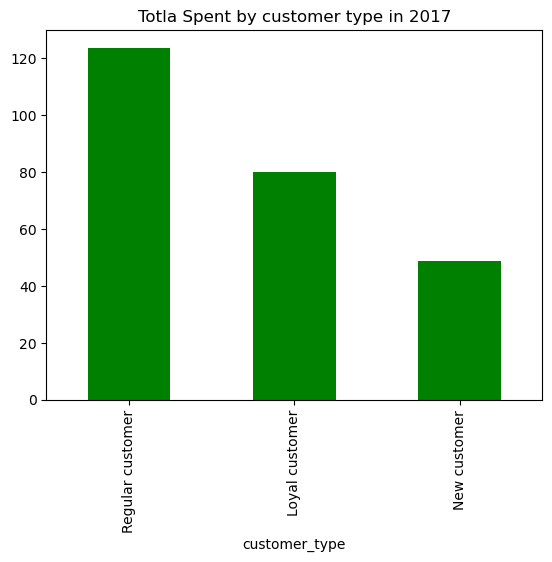

In [70]:
plt.title('Totla Spent by customer type in 2017')
bar_loyalty_spend=df['total_spend'].plot.bar(color='green')
bar_loyalty_spend.figure.savefig(os.path.join(path, '04 Analysis/Visualizations/bar_loyalty_spend.png'))

#### Although loyal customers place large orders, 49% of total sales come from regular customers.

### Step 5. a difference in expenditure (the “prices” column) depending on the hour of the day.

In [17]:
df_hour_spend = small[['order_hour_of_day','prices']]


C:\Users\jinu5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jinu5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


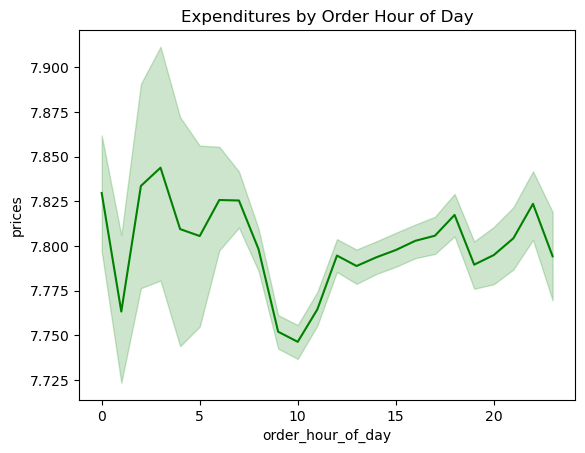

In [18]:
plt.title('Expenditures by Order Hour of Day')
line_hour = sns.lineplot(data = df_hour_spend, x = 'order_hour_of_day',y = 'prices', color='green')

#### 
This graph shows the price of ordered items over time.  
It is interesting that the lowest priced items are ordered at 10 AM, when order volume is highest as we indentified from Histogram of order hour of day.


In [19]:
line_hour.figure.savefig(os.path.join (path, '04 Analysis/Visualizations/line_hour_spend.png'))

In [13]:
aa = insta_cleaned[insta_cleaned['order_hour_of_day'] == 3].groupby('department_id').size()

In [14]:
aa_sum = aa.sum()

In [15]:
aa_sum


51281

In [16]:
# at 3am, how much orders did the customers make by department. 
result = insta_cleaned[insta_cleaned['order_hour_of_day'] == 3].groupby('department_id').size()
print(result)

department_id
1      4079
2        70
3      1823
4     14357
5       193
6       503
7      4703
8       256
9      1315
10       49
11      897
12     1110
13     3244
14     1067
15     1714
16     8058
17     1436
18      465
19     4192
20     1617
21      133
dtype: int64


### Step 6.  exploratory analysis of customer demographics for target marketing,  by creating a line chart exploring the connections between age and number of dependents

In [10]:
df_age_dependants = insta_cleaned[['Age','n_dependants']]

In [11]:
Age_dependents = small[['Age','n_dependants']]


C:\Users\jinu5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jinu5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


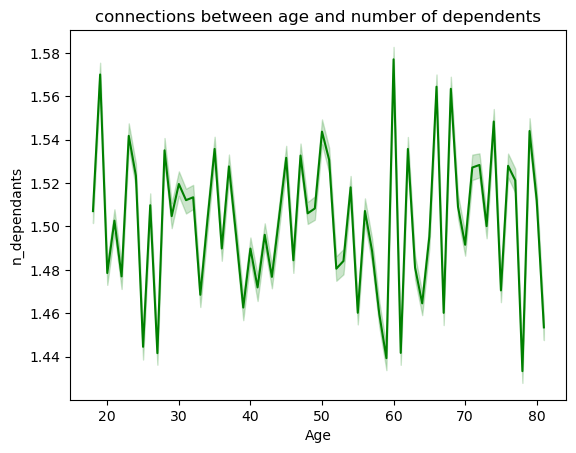

In [13]:
plt.title('connections between age and number of dependents')
line_hour = sns.lineplot(data = Age_dependents, x = 'Age',y = 'n_dependants', color='green')

In [15]:
line_hour.figure.savefig(os.path.join (path, '04 Analysis/Visualizations/line_age_dependents.png'))

#### From this graph, I don't find any relation between the age and the dependents.

### Step 7. connection between age and spending power (income).

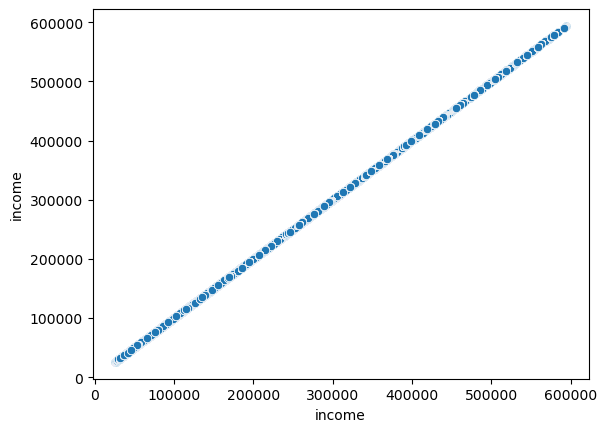

In [3]:
scatter_age_income=sns.scatterplot(x='income', y='income', data = insta_cleaned)

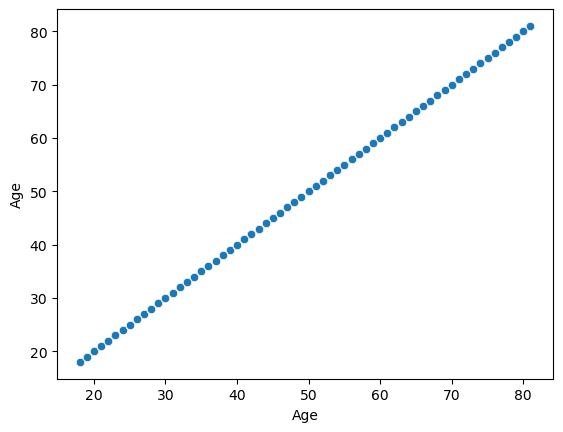

In [4]:
scatter_age_income=sns.scatterplot(x='Age', y='Age', data = insta_cleaned)

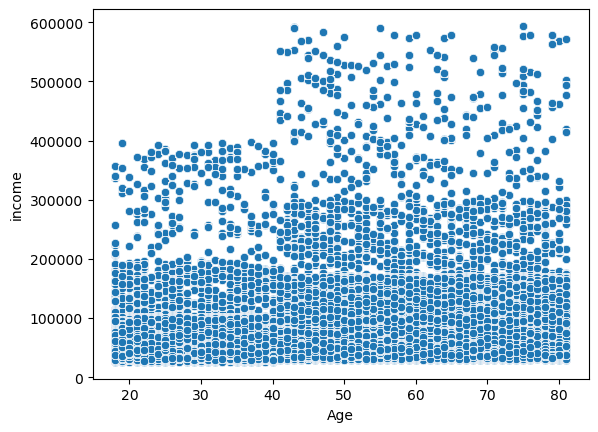

In [20]:
scatter_age_income=sns.scatterplot(x='Age', y='income', data = insta_cleaned)

#### 
Customers' income tends to increase significantly from the age of 40.  
The trend of higher incomes among those over 40 continues to customers in their 80s.  
However, further confirmation is needed to determine whether income level is directly related to company profits.

In [23]:
scatter_age_income.figure.savefig(os.path.join (path, '04 Analysis/Visualizations/scatter_age_income.png'))

In [24]:
insta_cleaned.to_pickle(os.path.join(path, '02 Data\Prepared Data/insta_cleaned.pkl'))